# Question 2
How does household type vs. location affect our target market? (can these factors increase or decrease our product value?)

In [1]:
#Dependencies
import requests
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV file, label it 'df1'
df1 = pd.read_csv(os.path.join("../Outputs/US_Census_Households.csv"), delimiter =',', index_col=0,)
df1

,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household
City,,,,,,
Auburn,Alabama,29136,13886,1034,2484,11732
Birmingham,Alabama,87570,18910,4355,19476,44829
Dothan,Alabama,30301,11998,1208,5818,11277
Hoover,Alabama,36721,21668,1488,2059,11506
Huntsville,Alabama,96551,39641,4259,10487,42164
...,...,...,...,...,...,...
Milwaukee,Wisconsin,232362,58247,16688,50756,106671
Oshkosh,Wisconsin,28532,10450,1566,2232,14284
Racine,Wisconsin,30885,8965,1801,7624,12495


In [3]:
# Read the next CSV file, label it 'df2', and then merge df1 and df2
df2 =  pd.read_csv(os.path.join("../Outputs/Main_Data_Set_Cleaned.csv"),delimiter =',', )
df2
df_merge = pd.merge(df1, df2, how= 'outer', indicator=True)
df_merge

,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household,City,Country,2021 Pop. Estimate,Pop. Growth (%),...,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website,_merge
0,Alabama,29136,13886,1034,2484,11732,Huntsville,United States,216963.0,1.0,...,69.67,1333.33,1087.50,1716.67,1650.00,5244.93,214372.0,215043.0,http://www.straighttoale.com,both
1,Alabama,29136,13886,1034,2484,11732,Birmingham,United States,197575.0,-1.0,...,69.43,1300.00,953.75,2140.00,1775.00,2929.90,200763.0,200133.0,http://www.goodpeoplebrewing.com,both
2,Alabama,87570,18910,4355,19476,44829,Huntsville,United States,216963.0,1.0,...,69.67,1333.33,1087.50,1716.67,1650.00,5244.93,214372.0,215043.0,http://www.straighttoale.com,both
3,Alabama,87570,18910,4355,19476,44829,Birmingham,United States,197575.0,-1.0,...,69.43,1300.00,953.75,2140.00,1775.00,2929.90,200763.0,200133.0,http://www.goodpeoplebrewing.com,both
4,Alabama,30301,11998,1208,5818,11277,Huntsville,United States,216963.0,1.0,...,69.67,1333.33,1087.50,1716.67,1650.00,5244.93,214372.0,215043.0,http://www.straighttoale.com,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,Wisconsin,31139,13132,1416,3694,12897,Eau Claire,United States,69441.0,0.0,...,73.50,800.00,650.00,1500.00,950.00,2758.00,69291.0,69313.0,http://www.lazymonkbrewing.com,both
2771,Wisconsin,31139,13132,1416,3694,12897,Green Bay,United States,107015.0,-0.0,...,63.80,1133.33,1000.00,2233.33,1916.67,2785.00,107300.0,107114.0,http://www.hinterlandbeer.com,both
2772,Wisconsin,31139,13132,1416,3694,12897,Madison,United States,269196.0,0.0,...,66.00,1398.75,1083.50,2440.00,1879.17,3535.50,268414.0,268846.0,http://www.aleasylum.com,both
2773,Wisconsin,31139,13132,1416,3694,12897,Milwaukee,United States,569330.0,-1.0,...,62.08,1436.88,893.75,2156.86,1485.71,5043.75,577235.0,576301.0,http://www.mkebrewing.com,both


In [4]:
# Sort the data in descending order to determine the cities with the highest total estimated households
# Drop null values 
# display the top 10 cities to consider
descend_data=df_merge.sort_values('Total Estimate', ascending= False)
descend_data.dropna(axis=0, how='any', inplace=True)
descend_data.head(10)


,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household,City,Country,2021 Pop. Estimate,Pop. Growth (%),...,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website,_merge
408,California,1410594,527979,102884,196583,583148,Los Angeles,United States,3849297.0,-1.0,...,67.950,2547.880,1962.830,4649.550,3599.83,5448.420,3893986.0,3889834.0,http://www.goldenroad.la,both
407,California,1410594,527979,102884,196583,583148,San Diego,United States,1381611.0,-0.0,...,73.610,2575.515,2050.860,4301.520,3500.00,5821.655,1385922.0,1385394.0,http://www.ballastpoint.com,both
406,California,1410594,527979,102884,196583,583148,Sacramento,United States,525041.0,0.0,...,71.780,1840.000,1700.000,3100.000,2500.00,4703.110,522754.0,523416.0,http://www.ruhstallerbeer.com,both
405,California,1410594,527979,102884,196583,583148,Chico,United States,102338.0,0.0,...,58.570,1275.000,1525.000,2375.000,2075.00,3616.670,102849.0,102177.0,http://www.sierranevada.com,both
1342,Illinois,1139537,364420,54991,160864,559262,Chicago,United States,2696555.0,-2.0,...,63.245,1969.120,1444.715,3941.990,2450.00,4816.985,2747231.0,2741730.0,http://www.halfacrebeer.com,both
2182,Texas,924981,331597,58866,151876,382642,Austin,United States,964177.0,0.0,...,65.180,2165.930,1529.090,3993.345,2555.94,5578.665,959549.0,963121.0,http://www.infamousbrewing.com,both
2181,Texas,924981,331597,58866,151876,382642,Austin,United States,964177.0,0.0,...,65.180,2165.930,1529.090,3993.345,2555.94,5578.665,959549.0,963121.0,http://www.independencebrewing.com,both
2185,Texas,924981,331597,58866,151876,382642,Dallas,United States,1288457.0,-1.0,...,69.300,1799.710,1416.260,3498.930,2434.73,5459.790,1304442.0,1303234.0,http://www.fcbrewing.com,both
2184,Texas,924981,331597,58866,151876,382642,Dallas,United States,1288457.0,-1.0,...,69.300,1799.710,1416.260,3498.930,2434.73,5459.790,1304442.0,1303234.0,http://www.deepellumbrewing.com,both
2183,Texas,924981,331597,58866,151876,382642,Houston,United States,2288250.0,-1.0,...,73.910,1590.760,1246.590,2941.190,1941.97,5074.350,2302792.0,2300027.0,https://www.karbachbrewing.com/,both


In [5]:
# create a dataframe that only looks at the top 10 cities (based off of 'Total Estimate')
top10_df= descend_data.iloc[:10]
top10_df.reset_index()

,index,State,Total Estimate,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household,City,Country,2021 Pop. Estimate,...,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website,_merge
0,408,California,1410594,527979,102884,196583,583148,Los Angeles,United States,3849297.0,...,67.950,2547.880,1962.830,4649.550,3599.83,5448.420,3893986.0,3889834.0,http://www.goldenroad.la,both
1,407,California,1410594,527979,102884,196583,583148,San Diego,United States,1381611.0,...,73.610,2575.515,2050.860,4301.520,3500.00,5821.655,1385922.0,1385394.0,http://www.ballastpoint.com,both
2,406,California,1410594,527979,102884,196583,583148,Sacramento,United States,525041.0,...,71.780,1840.000,1700.000,3100.000,2500.00,4703.110,522754.0,523416.0,http://www.ruhstallerbeer.com,both
3,405,California,1410594,527979,102884,196583,583148,Chico,United States,102338.0,...,58.570,1275.000,1525.000,2375.000,2075.00,3616.670,102849.0,102177.0,http://www.sierranevada.com,both
4,1342,Illinois,1139537,364420,54991,160864,559262,Chicago,United States,2696555.0,...,63.245,1969.120,1444.715,3941.990,2450.00,4816.985,2747231.0,2741730.0,http://www.halfacrebeer.com,both
5,2182,Texas,924981,331597,58866,151876,382642,Austin,United States,964177.0,...,65.180,2165.930,1529.090,3993.345,2555.94,5578.665,959549.0,963121.0,http://www.infamousbrewing.com,both
6,2181,Texas,924981,331597,58866,151876,382642,Austin,United States,964177.0,...,65.180,2165.930,1529.090,3993.345,2555.94,5578.665,959549.0,963121.0,http://www.independencebrewing.com,both
7,2185,Texas,924981,331597,58866,151876,382642,Dallas,United States,1288457.0,...,69.300,1799.710,1416.260,3498.930,2434.73,5459.790,1304442.0,1303234.0,http://www.fcbrewing.com,both
8,2184,Texas,924981,331597,58866,151876,382642,Dallas,United States,1288457.0,...,69.300,1799.710,1416.260,3498.930,2434.73,5459.790,1304442.0,1303234.0,http://www.deepellumbrewing.com,both
9,2183,Texas,924981,331597,58866,151876,382642,Houston,United States,2288250.0,...,73.910,1590.760,1246.590,2941.190,1941.97,5074.350,2302792.0,2300027.0,https://www.karbachbrewing.com/,both


In [6]:
#Clean the dataframe to display each city/state, household type, and population growth 
clean_top10_df= top10_df[['State','City', 'Married Households','Male Unmarried Household','Female Unmarried Household', 'Nonfamily Household', 'Pop. Growth (%)',]]
clean_top10_df

,State,City,Married Households,Male Unmarried Household,Female Unmarried Household,Nonfamily Household,Pop. Growth (%)
408,California,Los Angeles,527979,102884,196583,583148,-1.0
407,California,San Diego,527979,102884,196583,583148,-0.0
406,California,Sacramento,527979,102884,196583,583148,0.0
405,California,Chico,527979,102884,196583,583148,0.0
1342,Illinois,Chicago,364420,54991,160864,559262,-2.0
2182,Texas,Austin,331597,58866,151876,382642,0.0
2181,Texas,Austin,331597,58866,151876,382642,0.0
2185,Texas,Dallas,331597,58866,151876,382642,-1.0
2184,Texas,Dallas,331597,58866,151876,382642,-1.0
2183,Texas,Houston,331597,58866,151876,382642,-1.0


In [7]:
#set "City" as your index
clean_top10_df.set_index('City', inplace= True)

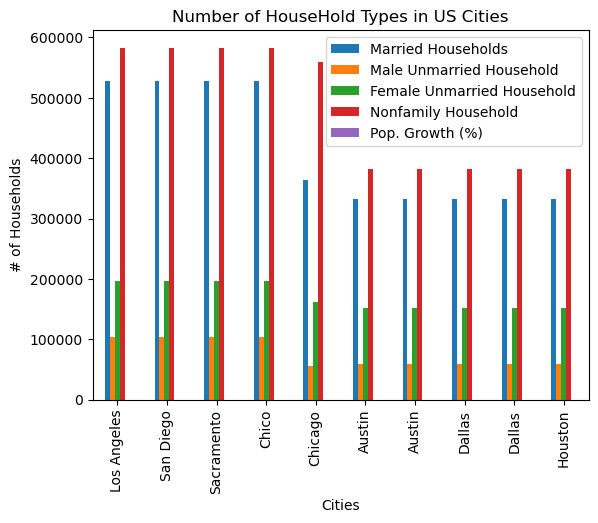

In [8]:
#create a grouped bar chart to visualize and compare the different household types for the top 10 cities 
households_fig1=clean_top10_df.plot(kind= 'bar', xlabel= 'Cities', ylabel= '# of Households', title= 'Number of HouseHold Types in US Cities')


In [9]:
# Create a dataframe that isolates the city/state and population growths and call it 'popGrowth_df'
popGrowth_df= top10_df[['State', 'City', 'Pop. Growth (%)']]
popGrowth_df

,State,City,Pop. Growth (%)
408,California,Los Angeles,-1.0
407,California,San Diego,-0.0
406,California,Sacramento,0.0
405,California,Chico,0.0
1342,Illinois,Chicago,-2.0
2182,Texas,Austin,0.0
2181,Texas,Austin,0.0
2185,Texas,Dallas,-1.0
2184,Texas,Dallas,-1.0
2183,Texas,Houston,-1.0


In [10]:
#set "City" as your index
popGrowth_df.set_index('City', inplace= True)

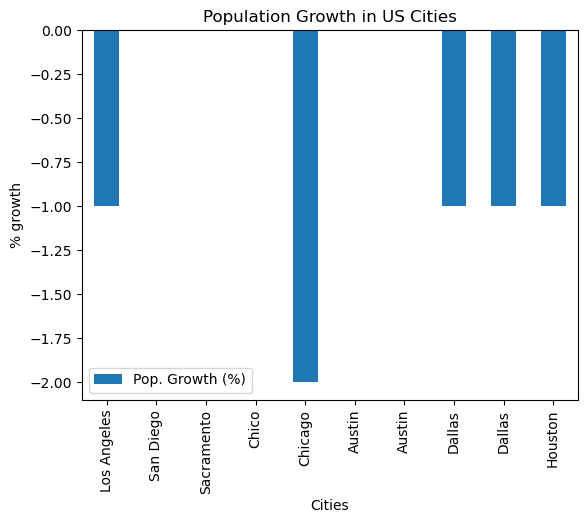

In [11]:
# Create a bar graph of the top 10 cities population growths
popGrowth_fig2=popGrowth_df.plot(kind= 'bar',xlabel='Cities', ylabel= '% growth', title= 'Population Growth in US Cities')